Импортируем необходимые библиотеки для работы.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as web
from matplotlib.ticker import FuncFormatter

Импортируем таблицу с ценами закрытия за период с апреля 2022 года по октябрь 2022 года

Преобразуем первую колонку в индекс.

In [ ]:
chmf = pd.read_csv("CHMF.csv", sep=';')
chmf = chmf.set_index('Дата')
sber = pd.read_csv("SBER.csv", sep=';')
sber = sber.set_index('Дата')
nlmk = pd.read_csv("NLMK.csv", sep=';')
nlmk = nlmk.set_index('Дата')
lkoh = pd.read_csv("LKOH.csv", sep=';')
lkoh = lkoh.set_index('Дата')
lkoh.head(5)




,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
Дата,,,,,,
01.12.2021,6576.5,6600.0,6740.5,6543.0,1.74M,0.97%
02.12.2021,6732.0,6611.0,6768.0,6558.0,1.46M,2.36%
03.12.2021,6639.5,6751.0,6770.0,6571.5,843.40K,-1.37%
06.12.2021,6650.0,6690.0,6740.0,6500.0,1.17M,0.16%
07.12.2021,6720.5,6664.0,6766.5,6645.0,2.17M,1.06%


In [ ]:
data = pd.DataFrame({
    'СеверСталь': chmf['Цена'].copy(),

})
data['Сбер'] = sber['Цена']
data['Лукоил'] = lkoh['Цена']
data['NLPK'] = nlmk['Цена']

data.head(5)





,СеверСталь,Сбер,Лукоил,NLPK
Дата,,,,
01.12.2021,1563.0,324.40,6576.5,216.22
02.12.2021,1587.4,326.80,6732.0,218.34
03.12.2021,1570.2,320.66,6639.5,219.40
06.12.2021,1556.0,307.50,6650.0,206.90
07.12.2021,1603.4,309.79,6720.5,208.36


In [ ]:
data.isnull().sum()

def fill_missing_data(data, method='ffill'):
    if method not in ['ffill', 'bfill']:
        raise ValueError("Invalid fill method. Choose 'ffill' or 'bfill'.")

    # Заполнение пропущенных значений
    if isinstance(data, pd.DataFrame):
        filled_data = data.fillna(method=method)
    elif isinstance(data, pd.Series):
        filled_data = data.fillna(method=method)
    else:
        raise TypeError("Invalid data type. Use pandas DataFrame or Series.")

    return filled_data



In [ ]:
data = fill_missing_data(data)

In [ ]:
data.isnull().sum()

СеверСталь    0
Сбер          0
Лукоил        0
NLPK          0
dtype: int64

Создаем список с названиями тикеров.

In [ ]:
tickers =  data.columns.tolist()
tickers


['СеверСталь', 'Сбер', 'Лукоил', 'NLPK']

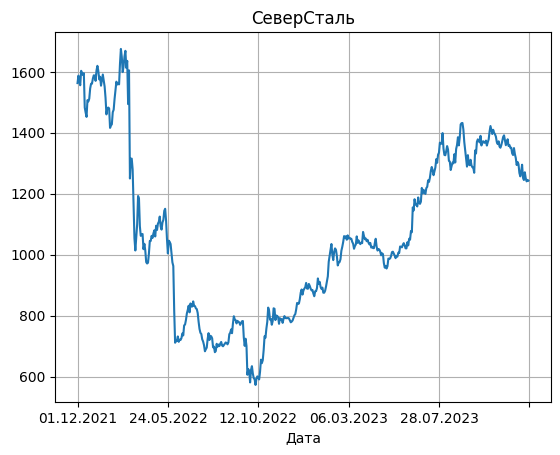

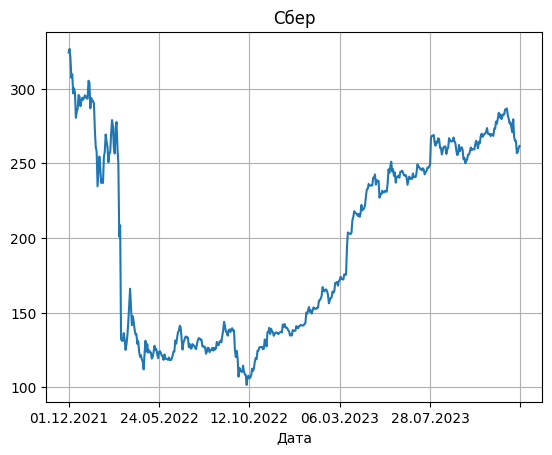

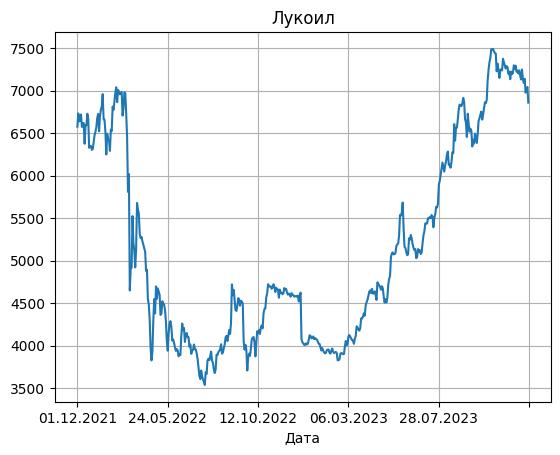

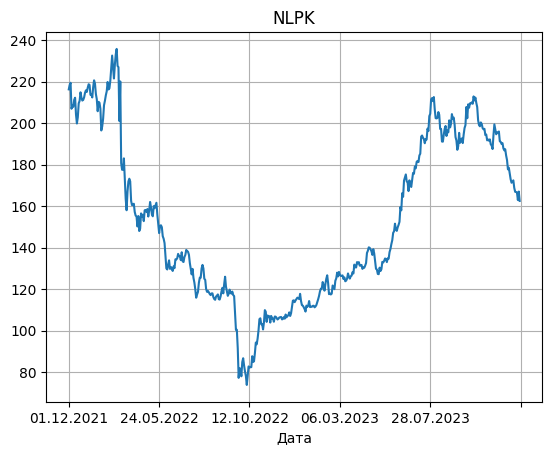

In [ ]:
for name in data:
    data[name].plot()
    plt.grid()
    plt.title(name)
    plt.show()

Находим первые разности и среднюю доходность каждой акции (dohMean).

In [ ]:
dCloseData= data.pct_change()
dCloseData

,СеверСталь,Сбер,Лукоил,NLPK
Дата,,,,
01.12.2021,NaN,NaN,NaN,NaN
02.12.2021,0.015611,0.007398,0.023645,0.009805
03.12.2021,-0.010835,-0.018788,-0.013740,0.004855
06.12.2021,-0.009043,-0.041040,0.001581,-0.056974
07.12.2021,0.030463,0.007447,0.010602,0.007057
...,...,...,...,...
08.12.2023,0.020402,0.000151,0.006768,-0.000719
11.12.2023,-0.015271,-0.031189,-0.022829,-0.001079
12.12.2023,-0.008313,0.002764,0.005375,-0.021969


In [ ]:
dohMean = dCloseData.mean()
dohMean

СеверСталь   -0.000095
Сбер          0.000090
Лукоил        0.000406
NLPK         -0.000256
dtype: float64

In [ ]:
dohSTD = dCloseData.std()
dohSTD

СеверСталь    0.026463
Сбер          0.030633
Лукоил        0.025023
NLPK          0.024879
dtype: float64

Создаем датафрейм с матрицей ковариаций и строим графики.

In [ ]:
cov = dCloseData.cov()
cov

,СеверСталь,Сбер,Лукоил,NLPK
СеверСталь,0.000700,0.000505,0.000350,0.000531
Сбер,0.000505,0.000938,0.000503,0.000490
Лукоил,0.000350,0.000503,0.000626,0.000340
NLPK,0.000531,0.000490,0.000340,0.000619


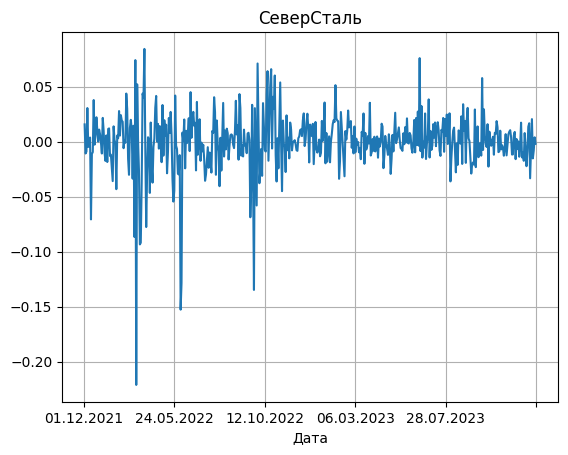

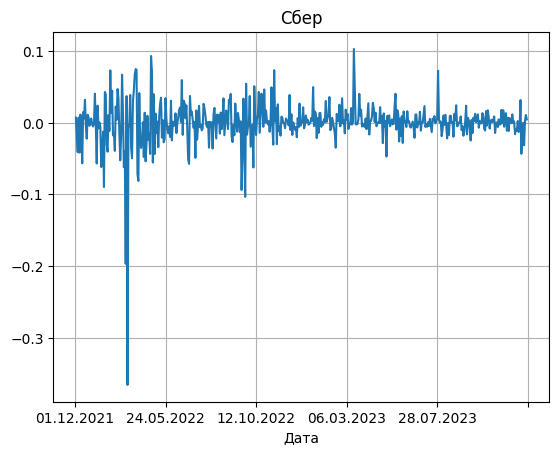

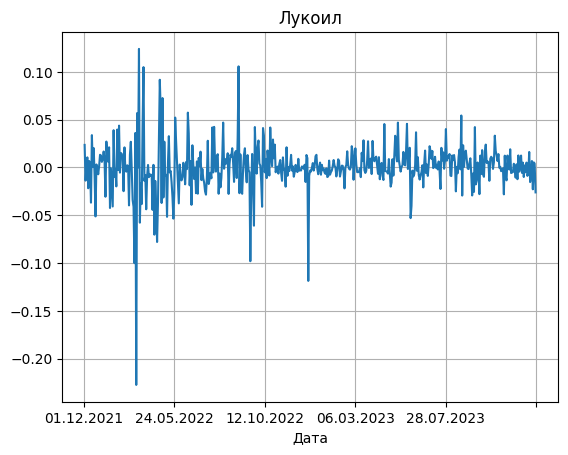

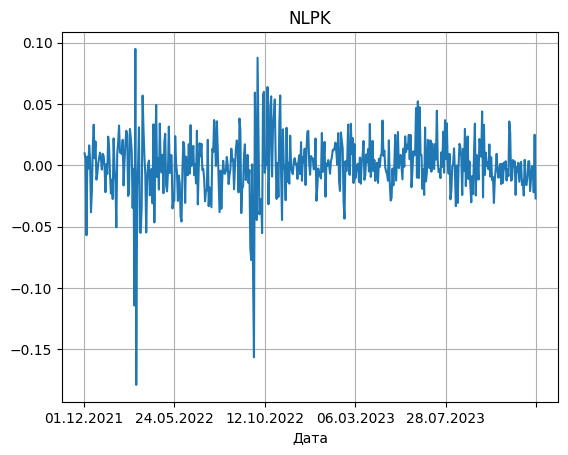

In [ ]:
for name in dCloseData.columns:
    dCloseData[name].plot()
    plt.title(name)
    plt.grid()
    plt.show()

Создаем функции для дальнейшего имитационного моделирования.

randPortf -  для моделирвоания рандомных долей каждой акции в портфеле.  

dohPortf - для нахождения доходности портфеля через матричное произведения заданных долей и доходности акции.

riskPortf - для расчета уровня риска.

In [ ]:
#Находим количество колонок
cnt = len(dCloseData.columns)
print(cnt)
def randPortf():
    res = np.exp(np.random.randn(cnt))
    res = res / res.sum()
    return res

r = randPortf()
print(r)
print(r.sum())

4
[0.43044458 0.05114208 0.38384046 0.13457287]
0.9999999999999998


In [ ]:
def dohPortf(r):
    return np.matmul(dohMean.values,r)

r = randPortf()
print(r)
d = dohPortf(r)
print(d)

[0.10930883 0.15867653 0.10735093 0.62466372]
-0.00011210242117902924


In [ ]:
def riskPortf(r):
    return np.sqrt(np.matmul(np.matmul(r,cov.values),r))

r = randPortf()
print(r)
rs = riskPortf(r)
print(rs)

[0.11710114 0.27327425 0.38643197 0.22319264]
0.02281583650521168


Создаем облако 10 000 различных портфелей, используя randPortf, и оцениваем доходность и волатильность с помощью dohPortf и riskPortf. Результаты сохраняем в 3 списка.

In [ ]:
N = 10000

risk = np.zeros(N)
doh = np.zeros(N)
portf = np.zeros((N,cnt))

for n in range(N):
    r = randPortf()

    portf[n,:] = r
    risk[n] = riskPortf(r)
    doh[n] = dohPortf(r)

Визуализируем полученные результаты. На рисунке отражены 10 000 полученных портфелей и выделены:
1. портфель с минимальным риском
2. портфель с максимальным коэффициентом Шарпа (доходность/риск)
3. портфель с равными долями активов

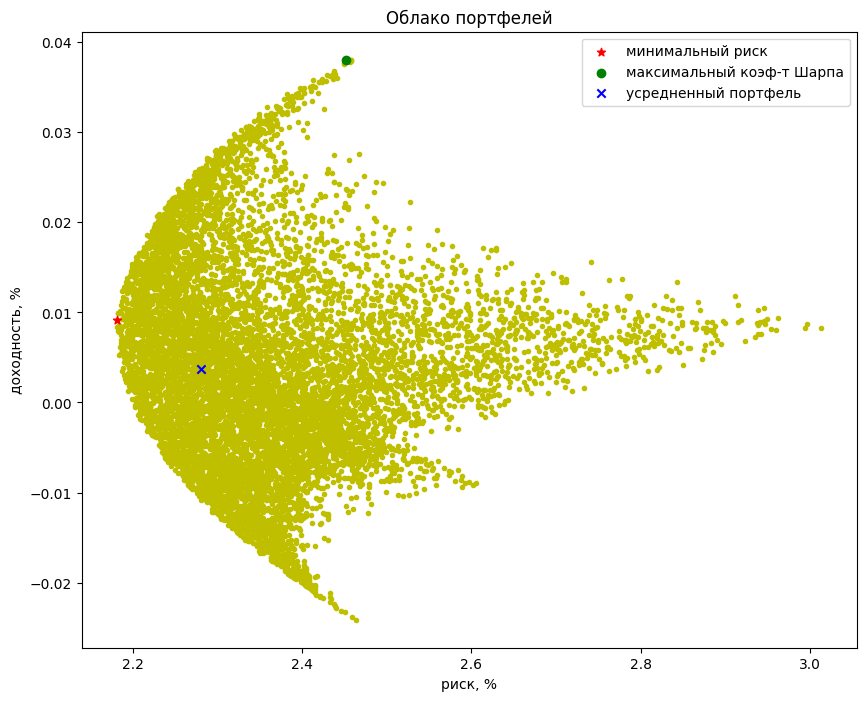

In [ ]:

plt.figure(figsize=(10,8))

plt.scatter(risk*100,doh*100,c='y',marker='.')
plt.xlabel('риск, %')
plt.ylabel('доходность, %')
plt.title("Облако портфелей")

min_risk = np.argmin(risk)
plt.scatter([(risk[min_risk])*100],[(doh[min_risk])*100],c='r',marker='*',label='минимальный риск')

maxSharpKoef = np.argmax(doh/risk)
plt.scatter([risk[maxSharpKoef]*100],[doh[maxSharpKoef]*100],c='g',marker='o',label='максимальный коэф-т Шарпа')

r_mean = np.ones(cnt)/cnt
risk_mean = riskPortf(r_mean)
doh_mean = dohPortf(r_mean)
plt.scatter([risk_mean*100],[doh_mean*100],c='b',marker='x',label='усредненный портфель')

plt.legend()

plt.show()

Результат оптимизации портфеля.

In [ ]:
print('---------- Минимальный риск ----------')
print()
print("риск = %1.2f%%" % (float(risk[min_risk])*100.))
print("доходность = %1.2f%%" % (float(doh[min_risk])*100.))
print()
print(pd.DataFrame([portf[min_risk]*100],columns=dCloseData.columns,index=['доли, %']).T)
print()

print('---------- Максимальный коэффициент Шарпа ----------')
print()
print("риск = %1.2f%%" % (float(risk[maxSharpKoef])*100.))
print("доходность = %1.2f%%" % (float(doh[maxSharpKoef])*100.))
print()
print(pd.DataFrame([portf[maxSharpKoef]*100],columns=dCloseData.columns,index=['доли, %']).T)
print()

print('---------- Средний портфель ----------')
print()
print("риск = %1.2f%%" % (float(risk_mean)*100.))
print("доходность = %1.2f%%" % (float(doh_mean)*100.))
print()
print(pd.DataFrame([r_mean*100],columns=dCloseData.columns,index=['доли, %']).T)
print()

---------- Минимальный риск ----------

риск = 2.18%
доходность = 0.01%

              доли, %
СеверСталь  15.135636
Сбер         1.313573
Лукоил      48.106414
NLPK        35.444377

---------- Максимальный коэффициент Шарпа ----------

риск = 2.45%
доходность = 0.04%

              доли, %
СеверСталь   2.622276
Сбер         1.312054
Лукоил      94.603626
NLPK         1.462044

---------- Средний портфель ----------

риск = 2.28%
доходность = 0.00%

            доли, %
СеверСталь     25.0
Сбер           25.0
Лукоил         25.0
NLPK           25.0

